<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Intro-to-Pytorch" data-toc-modified-id="Intro-to-Pytorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to Pytorch</a></span><ul class="toc-item"><li><span><a href="#Pytorch-tensors" data-toc-modified-id="Pytorch-tensors-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pytorch tensors</a></span></li><li><span><a href="#Pytorch-Autograd" data-toc-modified-id="Pytorch-Autograd-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pytorch Autograd</a></span></li><li><span><a href="#torch.nn-module" data-toc-modified-id="torch.nn-module-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>torch.nn module</a></span></li><li><span><a href="#Generating-fake-classification-data" data-toc-modified-id="Generating-fake-classification-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generating fake classification data</a></span></li></ul></li><li><span><a href="#Dataset-and-Data-loaders" data-toc-modified-id="Dataset-and-Data-loaders-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset and Data loaders</a></span><ul class="toc-item"><li><span><a href="#Two-layer-neural-network-model" data-toc-modified-id="Two-layer-neural-network-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Two layer neural network model</a></span></li><li><span><a href="#Computing-metrics-on-validation-set" data-toc-modified-id="Computing-metrics-on-validation-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Computing metrics on validation set</a></span></li><li><span><a href="#Training-Loop" data-toc-modified-id="Training-Loop-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training Loop</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Intro to Pytorch

PyTorch consists of 4 main packages:
* torch: a general purpose array library similar to Numpy that can do computations on GPU
* torch.autograd: a package for automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

## Pytorch tensors
Like Numpy tensors but can utilize GPUs to accelerate its numerical computations. 

In [2]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

In [3]:
x

tensor([[-0.5397, -0.5859,  0.0083,  1.0888, -0.7154, -0.6919,  0.2267, -0.6546,
          0.3618, -0.6747],
        [-0.0471, -1.9649, -0.0835,  0.3117,  0.0702,  0.8439, -1.4913, -0.5326,
          0.4917,  0.7853],
        [-0.9010,  0.2188,  0.4574,  1.6383,  0.0758, -0.7216, -0.4925,  0.2020,
          0.8290,  0.4312],
        [ 0.0246,  0.6071,  1.5779, -0.3464, -0.2736, -0.7958,  0.4770, -0.0029,
          1.3215, -0.5277],
        [ 0.5588, -0.0317, -1.3595, -0.0813, -0.7669, -0.6466,  2.1524,  0.9696,
         -1.4509,  1.2619]])

In [4]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[-0.5397, -0.5859,  0.0083,  1.0888, -0.7154, -0.6919,  0.2267, -0.6546,
          0.3618, -0.6747, -0.0471, -1.9649, -0.0835,  0.3117,  0.0702,  0.8439,
         -1.4913, -0.5326,  0.4917,  0.7853, -0.9010,  0.2188,  0.4574,  1.6383,
          0.0758, -0.7216, -0.4925,  0.2020,  0.8290,  0.4312,  0.0246,  0.6071,
          1.5779, -0.3464, -0.2736, -0.7958,  0.4770, -0.0029,  1.3215, -0.5277,
          0.5588, -0.0317, -1.3595, -0.0813, -0.7669, -0.6466,  2.1524,  0.9696,
         -1.4509,  1.2619]])

## Pytorch Autograd
The autograd package in PyTorch provides classes and functions implementing automatic differentiation of arbitrary scalar valued function. For example, the gradient of the error with respect to all parameters.

In order for this to happen we need to declare our paramerers as Tensors with the requires_grad=True keyword. Here is an example:

In [5]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [6]:
x.grad

In [7]:
L = (2*x**2+1).sum()
L

tensor(188., grad_fn=<SumBackward0>)

In [8]:
L.backward() # computes the grad of L with respect to x

In [9]:
x.grad

tensor([ 4.,  8., 12., 16., 20., 24.])

## torch.nn module
A neural net library with common layers and cost functions

`nn.Linear(5, 3)` creates a linear transformation ($A\cdot X+b$) of a $N \times 5$ matrix into a $N \times 3$ matrix, where N can be anything (number of observations).

In [10]:
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [11]:
# parameters are initialized randomly
[p for p in linear_map.parameters()]

[Parameter containing:
 tensor([[ 0.2598, -0.0397,  0.0231, -0.0747,  0.3198],
         [-0.1858,  0.0148,  0.2125,  0.1926,  0.3372],
         [ 0.1403,  0.1106,  0.3963,  0.0798, -0.4040]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2324, -0.0134, -0.3279], requires_grad=True)]

In [12]:
[p.shape for p in linear_map.parameters()]

[torch.Size([3, 5]), torch.Size([3])]

## Generating fake classification data

In [13]:
# generating fake data
# Here we generate some fake data
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def gen_nn_fake_data(n):
    x = np.random.uniform(0,10, (n, 2))
    x1 = x[:,0]
    x2 = x[:,1]
    score1 = sigmoid(-x1 - 8* x2 + 50)
    score2 = sigmoid(-7*x1 - 2* x2 + 50)
    score3 = 2* score1 + 3*score2 - 0.1
    y = score3 < 0
    return x, y.astype(int)

x, y = gen_nn_fake_data(500)

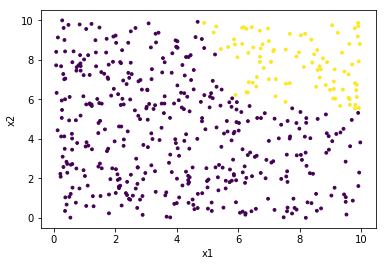

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=8);
plt.xlabel("x1"); plt.ylabel("x2");

# Dataset and Data loaders 

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

In [15]:
# create a dataset
class FakeDataset(Dataset):
    def __init__(self, n=10000):
        x, y = gen_nn_fake_data(n)
        x = torch.from_numpy(x)
        y = torch.from_numpy(y).float()
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return x, y[None]
    
train_ds = FakeDataset()
valid_ds = FakeDataset(n=5000)

Next we are going to create a data loader. The data loader provides the following features:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [16]:
train_dl = DataLoader(train_ds, batch_size=1000, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=1000)

In [17]:
x, y = next(iter(train_dl))

In [18]:
x.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

## Two layer neural network model

In [19]:
def two_layer_nn():
    model = torch.nn.Sequential(
        torch.nn.Linear(2, 2),
        torch.nn.Sigmoid(),
        torch.nn.Linear(2, 1)
    )
    return model

In [30]:
model = two_layer_nn()

## Computing metrics on validation set

In [25]:
from sklearn import metrics

In [26]:
def val_metric(model, valid_dl):
    model.eval()
    total = 0
    sum_loss = 0
    probs = []
    ys = []
    for x, y in valid_dl:
        batch = y.shape[0]
        out = model(x.float())
        probs.append(out.detach().cpu().numpy())
        ys.append(y.cpu().numpy())
        loss = F.binary_cross_entropy_with_logits(out, y.float())
        sum_loss += batch*(loss.item())
        total += batch
    
    probs = np.vstack(probs)
    ys = np.vstack(ys)
    auc = metrics.roc_auc_score(ys, probs)
    return sum_loss/total, auc

In [31]:
# random model
val_metric(model, valid_dl)

(0.6135916471481323, 0.038724665903898975)

## Training Loop

In [28]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
for t in range(100):
    for x, y in train_dl: 
        model.train()
        y_hat = model(x.float())
        loss = F.binary_cross_entropy_with_logits(y_hat, y)
    
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
    if t % 20 == 0: 
        val_loss, val_auc = val_metric(model, valid_dl)
        print("train_loss %.3f val_loss %.3f val_auc %.3f" % 
              (loss.item(), val_loss, val_auc))

train_loss 0.563 val_loss 0.563 val_auc 0.823
train_loss 0.357 val_loss 0.338 val_auc 0.988
train_loss 0.206 val_loss 0.200 val_auc 0.995
train_loss 0.120 val_loss 0.130 val_auc 0.999
train_loss 0.098 val_loss 0.096 val_auc 0.999
train_loss 0.072 val_loss 0.078 val_auc 0.999
train_loss 0.073 val_loss 0.065 val_auc 0.999
train_loss 0.064 val_loss 0.057 val_auc 0.999
train_loss 0.046 val_loss 0.050 val_auc 0.999
train_loss 0.046 val_loss 0.045 val_auc 0.999


In [93]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-0.3719, -1.2405],
        [-1.9598,  0.4572]], requires_grad=True), Parameter containing:
tensor([9.6982, 6.0535], requires_grad=True), Parameter containing:
tensor([[-9.8635, -7.0564]], requires_grad=True), Parameter containing:
tensor([4.0344], requires_grad=True)]


# References
* https://pytorch.org/docs/stable/index.html
* http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://hsaghir.github.io/data_science/pytorch_starter/